In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
df_adult= pd.read_csv('adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [62]:
df_adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Missing Value

In [63]:
df_adult.replace('?', np.nan,inplace=True)

In [64]:
df_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

missing value pada kolom workclass, occupation, native.county

## Preprocessing

preprocess scheme:
* one hot encoding : relationship, race, sex
* binary encoding : workclass, marital status, occupation, native country  
* ordinal encoding : education (already encoded)
* no treatment : size
* drop: fnlwgt, education (sudah diencode)

In [65]:
binary_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='constant', fill_value='NC')),
    ('encode', ce.BinaryEncoder())
])

transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'), ['relationship','race','sex']),
    ('binary',binary_pipe,['workclass','marital.status','occupation','native.country'])
    ], remainder='passthrough')

## Splitting

In [66]:
X=df_adult.drop(['fnlwgt','education','income'],axis=1)
y=np.where(df_adult['income']=='>50K',1,0)

In [67]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, random_state=10)

## Data Transformation

In [68]:
X_train_preprocessed= transformer.fit_transform(X_train)
X_test_preprocessed= transformer.transform(X_test)

In [69]:
X_test_preprocessed= pd.DataFrame(X_test_preprocessed)
X_train_preprocessed= pd.DataFrame(X_train_preprocessed)

In [70]:
X_test_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,37.0,10.0,7298.0,0.0,36.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,31.0,9.0,0.0,0.0,40.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,50.0,7.0,0.0,2444.0,40.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,34.0,9.0,0.0,0.0,48.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,32.0,9.0,0.0,1672.0,40.0


In [71]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [72]:
transformer.transformers_[1][1]['encode'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [73]:
features= list(transformer.transformers_[0][1].get_feature_names())+ transformer.transformers_[1][1]['encode'].get_feature_names() + ['age','education.num','capital.gain','capital.loss','hours.per.week']

In [74]:
X_test_preprocessed.columns=features
X_train_preprocessed.columns=features
X_train_preprocessed.head()

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0


## Model fitting and evaluation

In [28]:
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train_preprocessed,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred= model.predict(X_test_preprocessed)
accuracy_score(y_test,y_pred)

0.8258199238422799

## Model Properties

In [31]:
importance_table= pd.DataFrame({'imp': model.feature_importances_}, index=features)

In [33]:
importance_table.sort_values('imp',ascending=False)

,imp
capital.gain,0.452485
1_2,0.294635
education.num,0.252002
age,0.000878
3_1,0.000000
2_1,0.000000
2_2,0.000000
2_3,0.000000
2_4,0.000000
3_0,0.000000


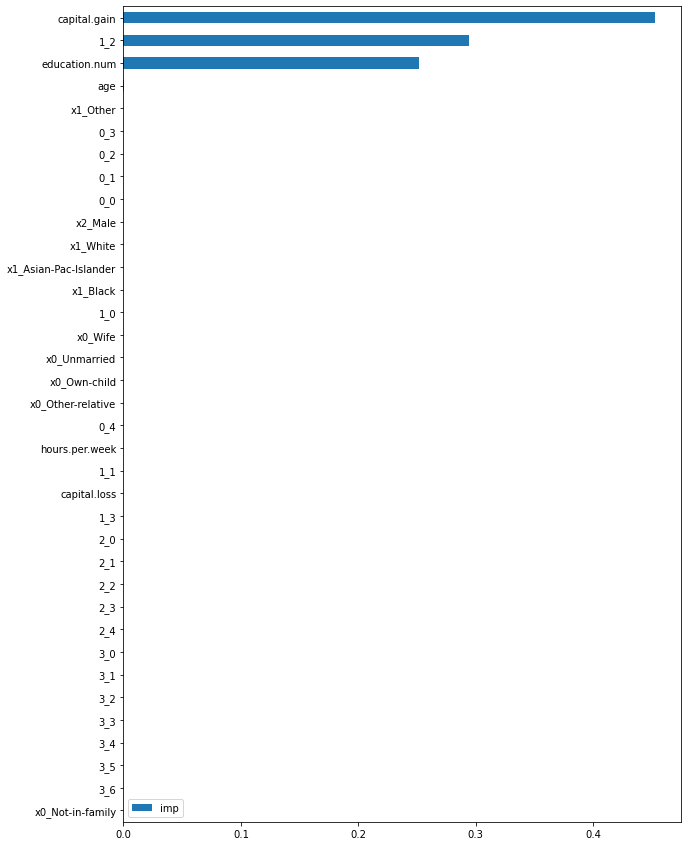

In [36]:
importance_table.sort_values('imp',ascending=True).plot(kind='barh', figsize=(10,15))

Lakukan Modeling ulang, dengan menggunakan hanya capital gain, education number dan marital status sebagai features.   

Apakah ada perubahan pada hasil evaluasi model

### Model based feature selection

In [ ]:
## After feature selection

In [40]:
X= df_adult[['capital.gain','education.num','marital.status']]
y=np.where(df_adult['income']=='>50K',1,0)

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, random_state=10)


In [42]:
binary_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='constant', fill_value='NC')),
    ('encode', ce.BinaryEncoder())
])

transformer=ColumnTransformer([
    ('binary',binary_pipe,['marital.status'])
    ], remainder='passthrough')

In [43]:
X_train_preprocessed= transformer.fit_transform(X_train)
X_test_preprocessed= transformer.transform(X_test)
X_test_preprocessed= pd.DataFrame(X_test_preprocessed)
X_train_preprocessed= pd.DataFrame(X_train_preprocessed)

In [50]:
transformer.transformers_[0][1]['encode']

BinaryEncoder()

In [51]:
features= transformer.transformers_[0][1]['encode'].get_feature_names() + ['capital.gain','education.num']

In [52]:
X_test_preprocessed.columns=features
X_train_preprocessed.columns=features
X_train_preprocessed.head()

,0_0,0_1,0_2,0_3,capital.gain,education.num
0,0,0,0,1,0,9
1,0,0,0,1,0,13
2,0,0,0,1,0,4
3,0,0,0,1,7298,9
4,0,0,1,0,0,13


In [53]:
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train_preprocessed,y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
y_pred= model.predict(X_test_preprocessed)
accuracy_score(y_test,y_pred)

0.825451418744626

performa model sedikit menurun, tapi kurang lebih sama

### Univariate Feature Selection

In [56]:
    from sklearn.feature_selection import SelectPercentile, RFE

In [75]:
select=SelectPercentile(percentile= 50)
select.fit(X_train_preprocessed,y_train)

SelectPercentile(percentile=50)

In [76]:
X_train_preprocessed_selected=select.transform(X_train_preprocessed)
X_test_preprocessed_selected= select.transform(X_test_preprocessed)

In [77]:
print('before selection', X_train_preprocessed.shape)
print('after selection', X_train_preprocessed_selected.shape)

before selection (24420, 36)
after selection (24420, 18)


jumlah feature berkurang 50%

In [81]:
mask=select.get_support()

In [83]:
selected_features= pd.DataFrame({'indicator': mask,'features':features})

In [84]:
selected_features[selected_features['indicator']==True]

,indicator,features
0,True,x0_Not-in-family
1,True,x0_Other-relative
2,True,x0_Own-child
3,True,x0_Unmarried
4,True,x0_Wife
6,True,x1_Black
8,True,x1_White
9,True,x2_Male
16,True,1_1
17,True,1_2


## Model Fitting and Evaluation

In [90]:
model=LogisticRegression()
model.fit(X_train_preprocessed_selected,y_train)
print('score', accuracy_score(y_test,model.predict(X_test_preprocessed_selected)))

score 0.8406829627809851


In [92]:
model=LogisticRegression()
model.fit(X_train_preprocessed,y_train)
print('score', accuracy_score(y_test,model.predict(X_test_preprocessed)))

score 0.844490848790075


performa model sedikit turun dibanding tanpa feature selection

## Binning

In [97]:
tips= sns.load_dataset('tips')

In [98]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


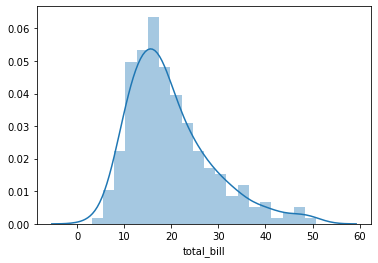

In [99]:
sns.distplot(tips['total_bill'],bins=20)

In [135]:
tips['total_bill eqfreq']= pd.qcut(tips['total_bill'],5)
tips['total_bill eqfreq encode']= pd.qcut(tips['total_bill'],5,labels=range(1,6))
# tips['total_bill eqfreq encode']= pd.qcut(tips['total_bill'],5,labels=['very low','low','medium','high','very high'])

In [102]:
tips['total_bill eqintv']=pd.cut(tips['total_bill'],5)
tips['total_bill eqintv encode']=pd.cut(tips['total_bill'],5,labels=range(1,6))

In [136]:
tips[['total_bill eqfreq','total_bill eqfreq encode', 'total_bill eqintv', 'total_bill eqintv encode']]

,total_bill eqfreq,total_bill eqfreq encode,total_bill eqintv,total_bill eqintv encode
0,"(16.222, 19.818]",3,"(12.618, 22.166]",2
1,"(3.069, 12.636]",1,"(3.022, 12.618]",1
2,"(19.818, 26.098]",4,"(12.618, 22.166]",2
3,"(19.818, 26.098]",4,"(22.166, 31.714]",3
4,"(19.818, 26.098]",4,"(22.166, 31.714]",3
...,...,...,...,...
239,"(26.098, 50.81]",5,"(22.166, 31.714]",3
240,"(26.098, 50.81]",5,"(22.166, 31.714]",3
241,"(19.818, 26.098]",4,"(22.166, 31.714]",3
242,"(16.222, 19.818]",3,"(12.618, 22.166]",2


## Equal Frequency

In [106]:
eqfreq= tips.pivot_table(
    index='total_bill eqfreq',
    aggfunc=len,
    values='tip')
eqfreq.columns=['freq']

eqfreq

,freq
total_bill eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


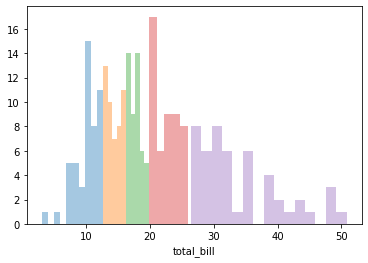

In [108]:
for i,j in zip(range(1,6),[10,5,5,5,15]):
    sns.distplot(tips[tips['total_bill eqfreq encode']==i]['total_bill'],kde=False, bins=j)

## Equal Interval

In [110]:
eqintv= tips.pivot_table(
    index='total_bill eqintv',
    aggfunc=len,
    values='tip')
eqintv.columns=['freq']

eqintv

,freq
total_bill eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


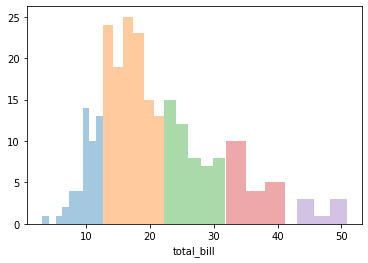

In [111]:
for i in range(1,6):
    sns.distplot(tips[tips['total_bill eqintv encode']==i]['total_bill'],kde=False)

## Binning Effect on Modeling 

In [113]:
from sklearn.preprocessing import KBinsDiscretizer


In [114]:
disk= pd.read_csv('disk.csv')

In [116]:
disk['class'].value_counts()/disk.shape[0]/100

1    0.005186
0    0.004814
Name: class, dtype: float64

karena proporsi kelas 1 dan 0 hampir sama, maka kita bisa melakukan binning langsung pada variabel x

In [118]:
disk['x eqitv']= pd.cut(disk['x'],7)
disk['x eqitv encode']= pd.cut(disk['x'],7,labels=range(1,8))

In [119]:
disk.head()

,x,class,x eqitv,x eqitv encode
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [120]:
pd.crosstab(disk['x eqitv'], disk['class'],normalize=0) # proporsi kelas 0 dan 1 pada setiap interval

class,0,1
x eqitv,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


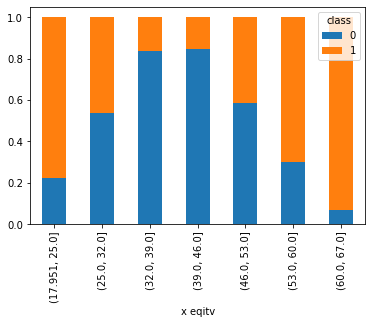

In [121]:
pd.crosstab(disk['x eqitv'], disk['class'],normalize=0).plot(kind= 'bar', stacked=True)

Dari gambar di atas, kita bisa melihat, bahwa setelah kita membagi feature menjadi 7 kelas, maka terlihat ada pola di mana proporsi kelas 1 menurun sampai ke interval 4, lalu kemudian naik lagi. Ini menunjukan hubungan non linear antara X dan class.

# Model without binning

In [126]:
X= disk[['x']]
y= disk['class']

X_train,X_test,y_train, y_test= train_test_split(X,y, stratify=y, random_state=2020)

In [127]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred=logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.5822454308093995

Jadi, sebelum binning, nilai akurasi= 58.22%

## Model with Binning

In [129]:
discretize= KBinsDiscretizer()
discretize.fit(X_train)
X_train_disc= discretize.transform(X_train)
X_test_disc= discretize.transform(X_test)

In [131]:
logreg=LogisticRegression()
logreg.fit(X_train_disc,y_train)

LogisticRegression()

In [132]:
y_pred=logreg.predict(X_test_disc)
accuracy_score(y_test,y_pred)

0.6997389033942559

In [ ]:
accuracy score meningkat menjadi 69.97% dari 58.22%

In [139]:
disk[['x','class']]

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1
...,...,...
1524,58,1
1525,64,1
1526,47,0
1527,26,1


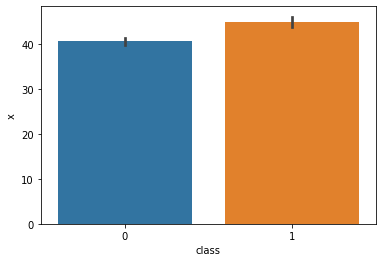

In [144]:
sns.barplot(y='x', x='class', data=disk)

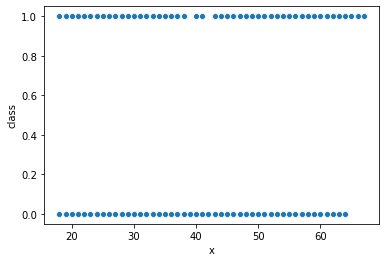

In [145]:
sns.scatterplot(x='x',y='class', data=disk)

In [146]:
X_train_disc

<1146x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1146 stored elements in Compressed Sparse Row format>

In [161]:
pd.DataFrame({'disk':discretize.inverse_transform(X_test_disc).flatten(), 'x': [i for i in X_test['x']]})

,disk,x
0,62.0,58
1,52.5,51
2,52.5,49
3,42.5,47
4,52.5,48
...,...,...
378,32.5,33
379,23.0,23
380,32.5,35
381,62.0,61
